In [49]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import seaborn as sn
from sklearn.svm import SVC
from stringkernels.kernels import string_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load Train Data

In [50]:
train_data = pd.read_csv("/content/train_data.csv")
train_data

,id,text
0,0,Anyway Im getting of for a while
1,1,"My red, Apache isn't feelin too well this morn..."
2,2,@danyelljoy you should be its great. friday w...
3,3,its 11:30pm and i dont wanna sleep; so i debat...
4,4,Why does twitter eat my DM's? Not happy
...,...,...
1040318,1040318,getting ready 2 watch mental
1040319,1040319,Wristcutters and Half Nelson are on Sundance F...
1040320,1040320,@t_isfortammy Going out in Northbridge makes m...
1040321,1040321,@iModel_ lol.... Gorgeous...lol! U look sooo m...


#### Load Test Data

In [51]:
test_data = pd.read_csv("/content/test_data.csv")
test_data

,id,text
0,0,so cut... missed out on all the TCE EXTREME ME...
1,1,Thank you very much Wasin this is awesome lol
2,2,Squeezing in some internet time before Dustin ...
3,3,@fanoou; Oh i do have moral but i'm gonna be b...
4,4,@NSuissa I just bought Sammy some joint/hip ...
...,...,...
560170,560170,@meganintime So is mine and I've only got abou...
560171,560171,@FairyForest Thanks cutie ) Wishing u a wonder...
560172,560172,ok know i just got home my family just drop me...
560173,560173,long run status: complete. Now time for church...


In [52]:
train_results = pd.read_csv("/content/train_results.csv")
train_results

,id,target
0,0,positive
1,1,negative
2,2,positive
3,3,positive
4,4,negative
...,...,...
1040318,1040318,positive
1040319,1040319,negative
1040320,1040320,negative
1040321,1040321,positive


#### Load Train Result

In [53]:
Lencoder = preprocessing.LabelEncoder()
Lencoder.fit(train_results['target'])
train_results['target']=Lencoder.transform(train_results['target'])
train_results

,id,target
0,0,2
1,1,0
2,2,2
3,3,2
4,4,0
...,...,...
1040318,1040318,2
1040319,1040319,0
1040320,1040320,0
1040321,1040321,2


2    520436
0    519803
1        84
Name: target, dtype: int64


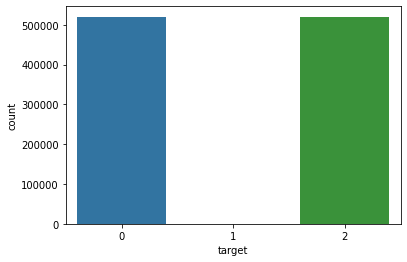

In [54]:
print(train_results['target'].value_counts())
sn.countplot(x ='target', data = train_results)

#### Preprocess Data

In [55]:
def preprocess(text):
    """Preprocess the text by lowercasing, removing punctuation, and lemmatizing."""

    text=  text.strip()  
    text=  re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text= re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Removes url
    text = re.compile(r'<[^>]+>').sub('', text) #Removes HTML tags:
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # Single character removal
    text = re.sub(r'\s+', ' ', text) # Remove multiple spaces
    # Lowercase the text
    text = text.lower() 
    # Remove punctuation
    text = text.translate(text.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)

In [56]:
X_train_preprocessed = [preprocess(text) for text in train_data['text']]

In [57]:
texts_train, texts_test, labels_train, labels_test = train_test_split(X_train_preprocessed, train_results['target'], test_size=0.25, random_state=42)

In [58]:
# vectorization using Bag-of-Words (with Tf-Idf )
tfidf_vectorizer = TfidfVectorizer(max_features=200000, ngram_range=(1,3))
X_train_bow = tfidf_vectorizer.fit_transform(texts_train) 
X_test_bow = tfidf_vectorizer.transform(texts_test)

In [59]:
# Create a Logistic Regression 
classifier = LogisticRegression(C=1.0, max_iter=5000)

# Fit the classifier to the training data
classifier.fit(X_train_bow, labels_train)

LogisticRegression(max_iter=5000)

In [60]:
# Testing on validation set
predictions = classifier.predict(X_test_bow)
print(accuracy_score(labels_test, predictions))

0.8208711901292289
